In [1]:
# !pip install tensorflow keras numpy pandas matplotlib scikit-learn

In [2]:
import numpy as np
import pandas as pd
import sklearn
import time
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
import tensorflow as tf
from tensorflow.keras import layers, models
import sys
import numpy
import os
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
numpy.set_printoptions(threshold=sys.maxsize)

In [5]:
img_size = 150
nbr_images = 8005

In [6]:
data = np.load(f'../data/images.npy')
y_label = np.load(f'../data/labels.npy')

# remove the filler type
new_data_without_filler = np.zeros((nbr_images, img_size, img_size, 3)) # defult was 150,150,3
new_y_label_without_filler = np.zeros(nbr_images, dtype=int)
i = 0
for idx, val in enumerate(y_label):
    new_data_without_filler[i] = data[idx]
    new_y_label_without_filler[i] = y_label[idx]
    i+=1
data = new_data_without_filler
y_label = new_y_label_without_filler

In [7]:

train_images, validation_images, train_labels, validation_labels = train_test_split(data, y_label, test_size=0.2, random_state=42)
train_images, validation_images = train_images / 255.0, validation_images / 255.0
class_names = ['cat', 'dog']

# set up the model and train
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
# model.summary()
# compile the model
model.compile(optimizer='adam',
            loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
            metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=70,
                    validation_data=(validation_images, validation_labels))




Epoch 1/70



c:\Users\raidb\anaconda3\Lib\site-packages\keras\src\backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(



201/201 [==============================] - 84s 406ms/step - loss: 0.6791 - accuracy: 0.5963 - val_loss: 0.6393 - val_accuracy: 0.6315
Epoch 2/70
201/201 [==============================] - 80s 398ms/step - loss: 0.5765 - accuracy: 0.6949 - val_loss: 0.5821 - val_accuracy: 0.6796
Epoch 3/70
201/201 [==============================] - 80s 399ms/step - loss: 0.5191 - accuracy: 0.7413 - val_loss: 0.5547 - val_accuracy: 0.7283
Epoch 4/70
201/201 [==============================] - 78s 390ms/step - loss: 0.4558 - accuracy: 0.7798 - val_loss: 0.5910 - val_accuracy: 0.6958
Epoch 5/70
201/201 [==============================] - 81s 403ms/step - loss: 0.3936 - accuracy: 0.8214 - val_loss: 0.5396 - val_accuracy: 0.7489
Epoch 6/70
201/201 [==============================] - 79s 394ms/step - loss: 0.2778 - accuracy: 0.8773 - val_loss: 0.5601 - val_accuracy: 0.7676
Epoch 7/70
201/201 [==============================] - 78s 389ms/step - loss: 0.1829 - accuracy: 0.9286 - val_loss: 0.7419 - val_accuracy: 0.

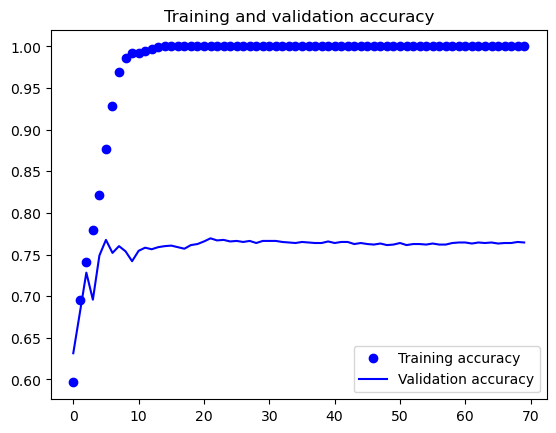

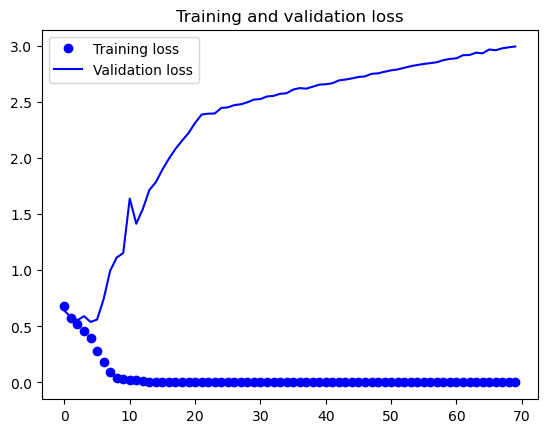

In [8]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
model.save('../saved_models/cats_and_dogs_classifier.h5')